# Introduction


<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!


### Install Package with Country Codes


In [2]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Upgrade Plotly

Run the cell below if you are working with Google Colab.


In [3]:
# %pip install --upgrade plotly

### Import Statements


In [63]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation


In [64]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data


In [65]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

- What is the shape of `df_data`?
- How many rows and columns does it have?
- What are the column names?
- Are there any NaN values or duplicates?


In [66]:
df_data.shape

(4324, 9)

In [67]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [68]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [69]:
df_data.duplicated().value_counts()

False    4324
Name: count, dtype: int64

In [70]:
df_data.isna().value_counts()

Unnamed: 0.1  Unnamed: 0  Organisation  Location  Date   Detail  Rocket_Status  Price  Mission_Status
False         False       False         False     False  False   False          True   False             3360
                                                                                False  False              964
Name: count, dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.


In [71]:
df_data.duplicated().value_counts()

False    4324
Name: count, dtype: int64

In [72]:
df_data.isna().value_counts()

Unnamed: 0.1  Unnamed: 0  Organisation  Location  Date   Detail  Rocket_Status  Price  Mission_Status
False         False       False         False     False  False   False          True   False             3360
                                                                                False  False              964
Name: count, dtype: int64

In [73]:
df_data.Price.isna().value_counts()

Price
True     3360
False     964
Name: count, dtype: int64

In [74]:
def foo(x):
    if type(x) is str:
        return x.replace(',', '_')

df_data['Price'] = df_data['Price'].apply(foo)
df_data['Price'] = df_data['Price'].astype(np.float64)

In [75]:
df_data['Price'].fillna(df_data['Price'].mean(), inplace=True)

In [76]:
df_data['Price'].isna().value_counts()

Price
False    4324
Name: count, dtype: int64

## Descriptive Statistics


In [77]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,"4,324.00","4,324.00","4,324.00"
mean,"2,161.50","2,161.50",153.79
std,"1,248.38","1,248.38",136.14
min,0.00,0.00,5.30
25%,"1,080.75","1,080.75",153.79
50%,"2,161.50","2,161.50",153.79
75%,"3,242.25","3,242.25",153.79
max,"4,323.00","4,323.00","5,000.00"


In [78]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    4324 non-null   int64  
 1   Unnamed: 0      4324 non-null   int64  
 2   Organisation    4324 non-null   object 
 3   Location        4324 non-null   object 
 4   Date            4324 non-null   object 
 5   Detail          4324 non-null   object 
 6   Rocket_Status   4324 non-null   object 
 7   Price           4324 non-null   float64
 8   Mission_Status  4324 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 304.2+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.


In [79]:
df_per_org = df_data['Organisation'].value_counts()
df_per_org

Organisation
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'

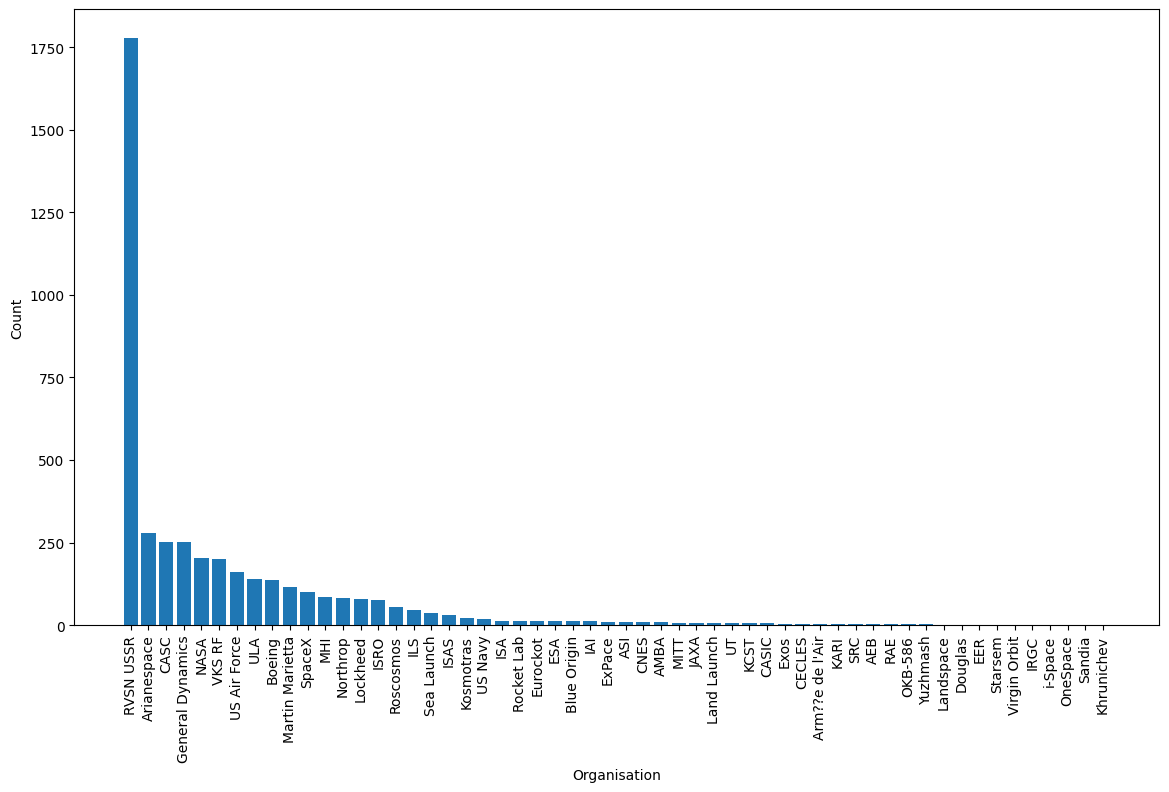

In [80]:
plt.figure(figsize=(14, 8))
plt.bar(df_per_org.index, df_per_org.values)
plt.xticks(rotation=90)
plt.xlabel('Organisation')
plt.ylabel('Count')
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?


In [81]:
df_rocket_status = df_data['Rocket_Status'].value_counts()
df_rocket_status.head()

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

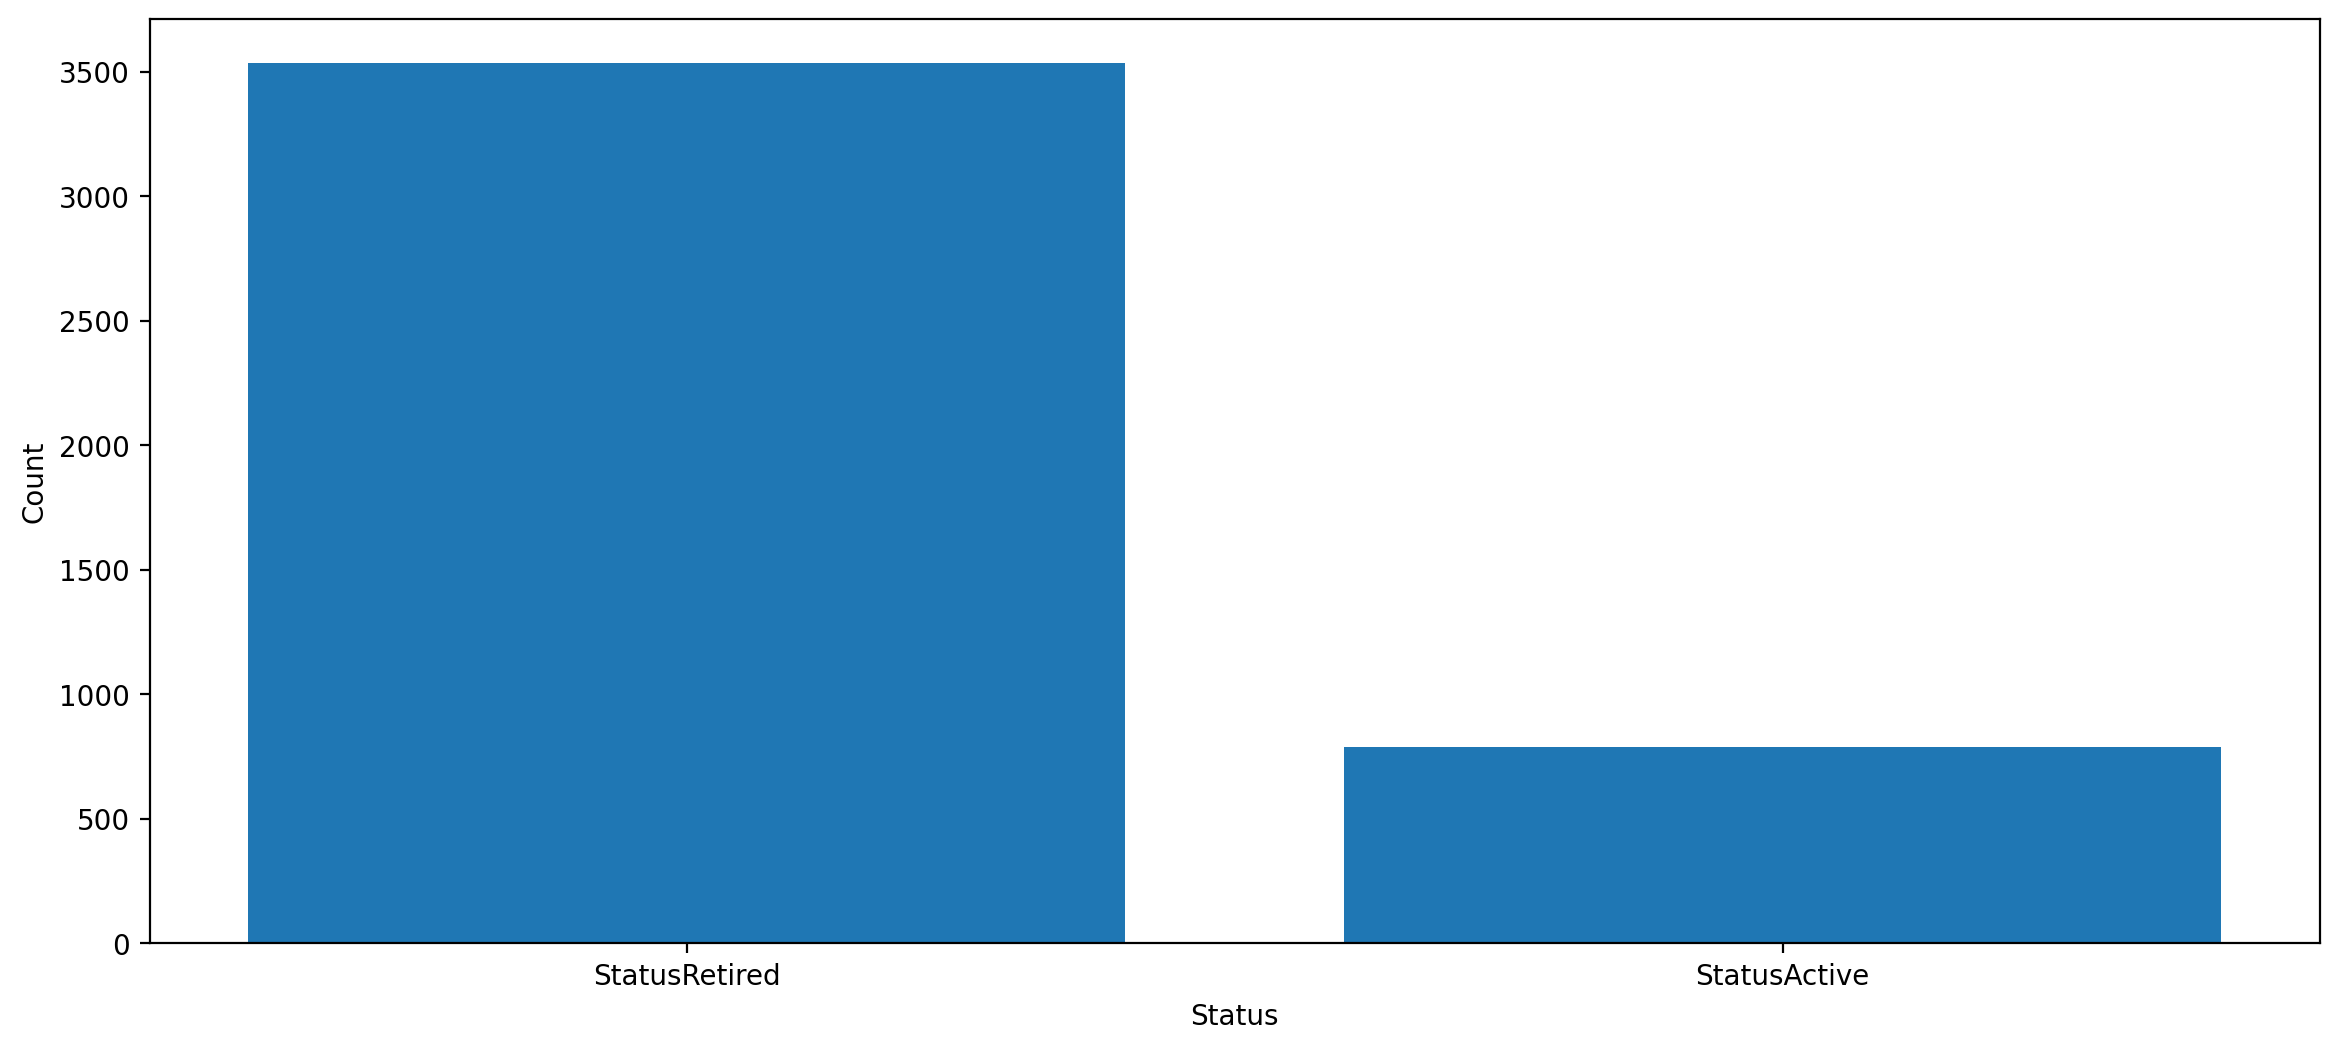

In [82]:
plt.figure(figsize=(14, 6), dpi=200)
plt.bar(df_rocket_status.index, df_rocket_status.values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?


In [83]:
df_mission_status = df_data['Mission_Status'].value_counts()
df_mission_status

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

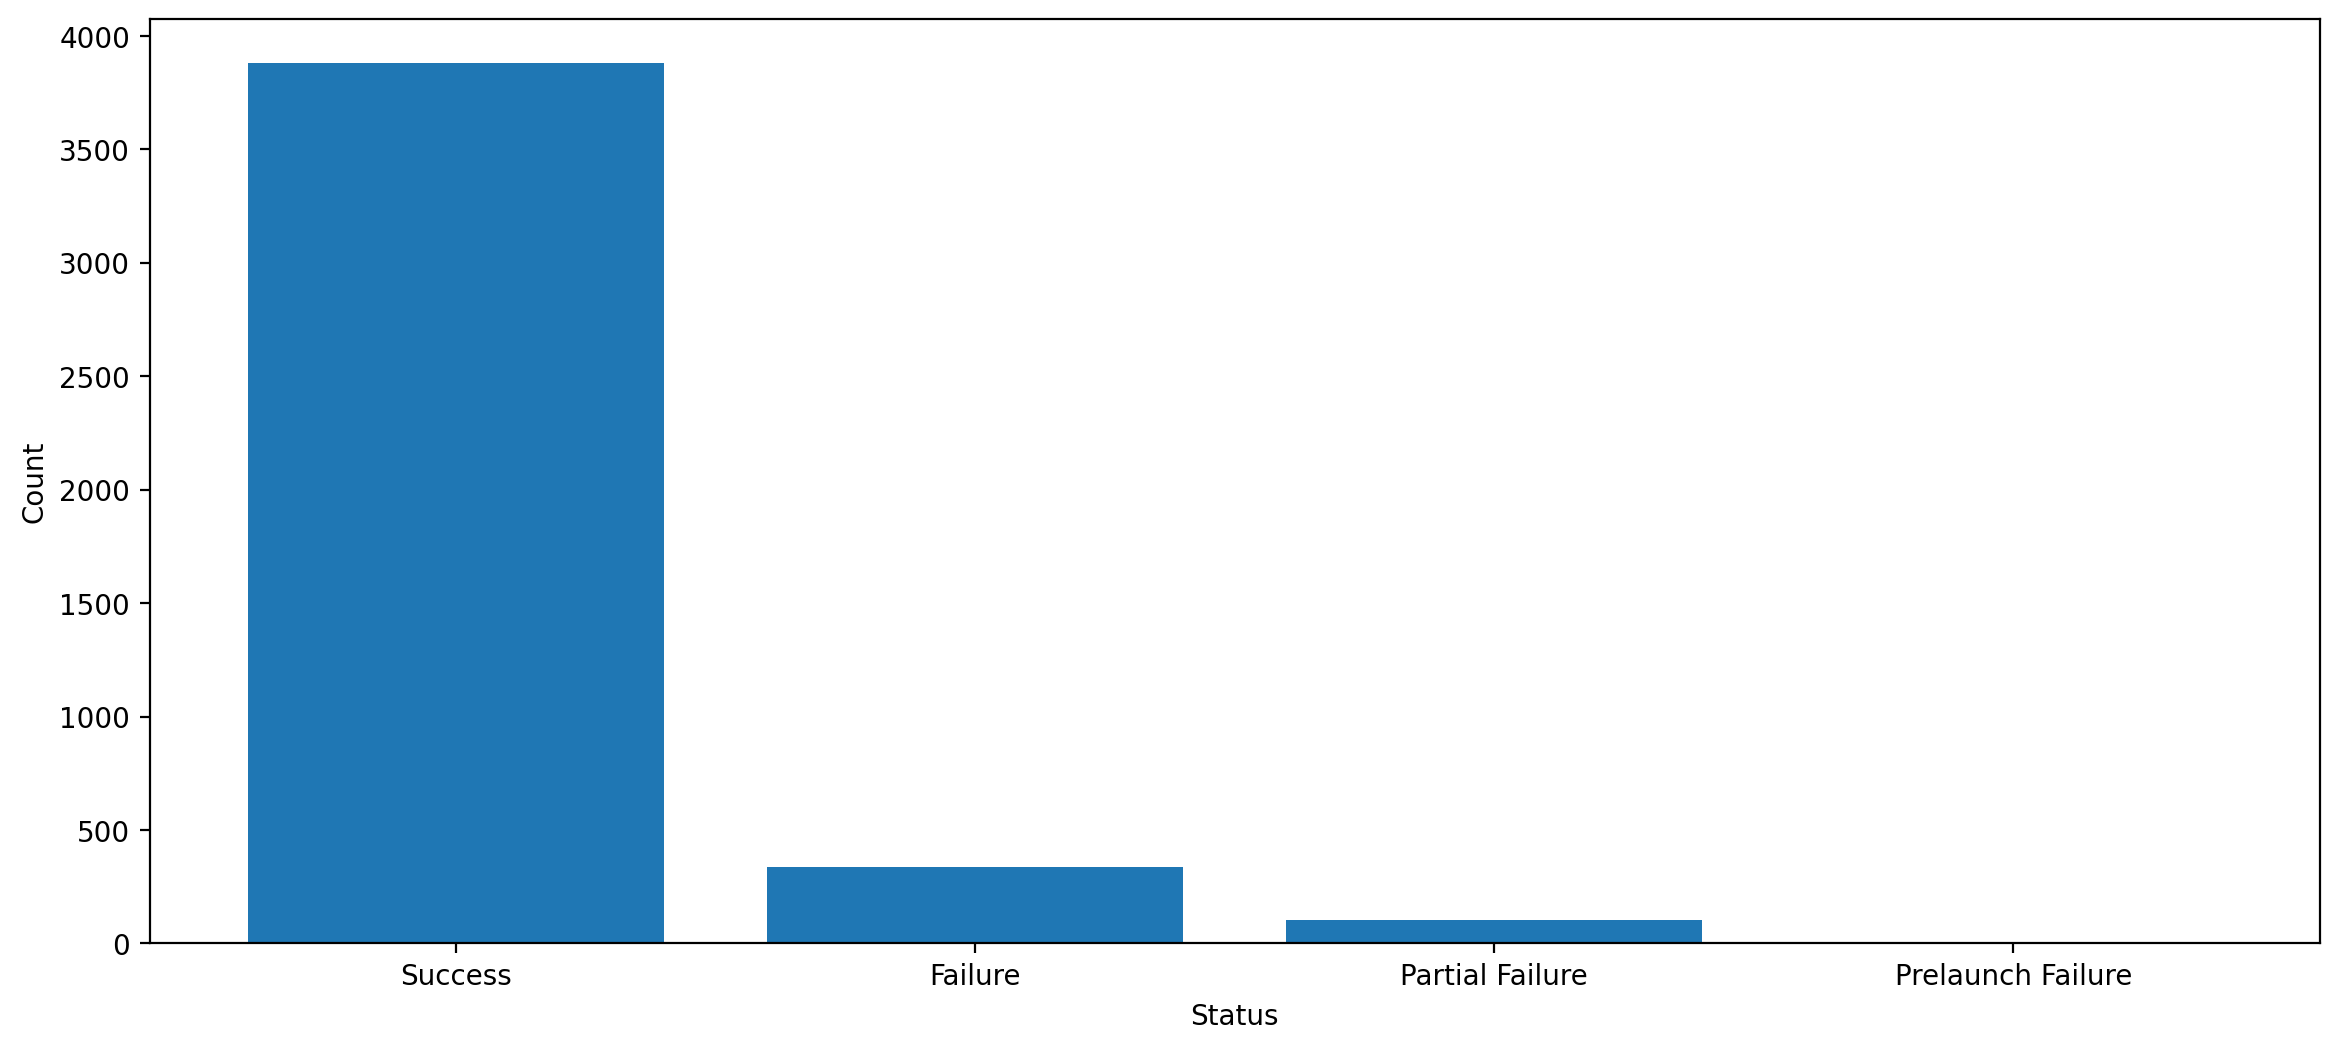

In [84]:
plt.figure(figsize=(14, 6), dpi=200)
plt.bar(df_mission_status.index, df_mission_status.values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).


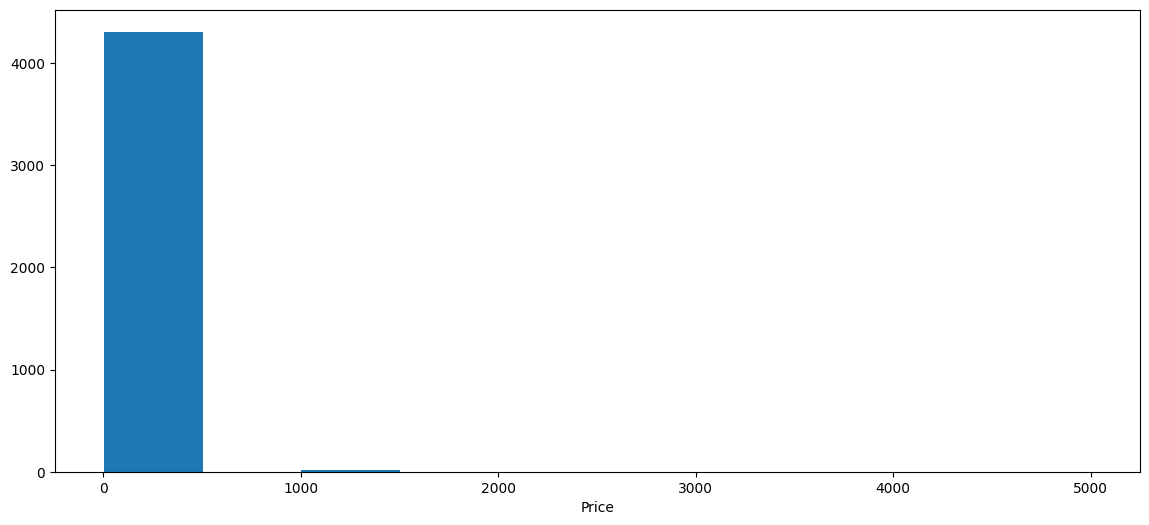

In [85]:
plt.figure(figsize=(14, 6))
plt.hist(df_data['Price'])
plt.xlabel('Price')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

- Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
- Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
- You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

- Russia is the Russian Federation
- New Mexico should be USA
- Yellow Sea refers to China
- Shahrud Missile Test Site should be Iran
- Pacific Missile Range Facility should be USA
- Barents Sea should be Russian Federation
- Gran Canaria should be USA

You can use the iso3166 package to convert the country names to Alpha3 format.


In [86]:
def foo(x):
    updates = {
        'Russia': 'Russian Federation',
        'New Mexico': 'USA',
        'Yellow Sea': 'China',
        'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
        'Pacific Missile Range Facility': 'USA',
        'Barents Sea': 'Russian Federation',
        'Gran Canaria': 'USA',
        'Iran': 'Iran, Islamic Republic of',
        'North Korea': 'Korea, Democratic People\'s Republic of',
        'Pacific Ocean': 'USA',
        'South Korea': 'Korea, Republic of' 
    }
    country = x.split(',')[-1].strip()
    if updates.get(country) is not None:
        country = updates.get(country)
    
    return countries.get(country).alpha3

df_data['Country'] = df_data['Location'].apply(foo)

In [87]:
fig = px.choropleth(df_data, locations='Country')
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [88]:
df_failure_countries = df_data[df_data['Mission_Status'] == 'Failure'].groupby('Country', as_index=False)['Country'].value_counts()
df_failure_countries.head()

,Country,count
0,AUS,3
1,BRA,2
2,CHN,19
3,FRA,13
4,IND,8


In [89]:
fig = px.choropleth(df_failure_countries, locations='Country', color='count')
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.


In [90]:
df_sunburst = df_data[['Country', 'Organisation', 'Mission_Status']].groupby(['Country', 'Organisation', 'Mission_Status'], as_index=False).value_counts()
df_sunburst

,Country,Organisation,Mission_Status,count
0,AUS,AMBA,Success,1
1,AUS,CECLES,Failure,2
2,AUS,CECLES,Success,1
3,AUS,RAE,Failure,1
4,AUS,RAE,Success,1
...,...,...,...,...
127,USA,US Air Force,Success,129
128,USA,US Navy,Failure,14
129,USA,US Navy,Partial Failure,1
130,USA,US Navy,Success,2


In [91]:
fig = px.sunburst(df_sunburst, path=['Mission_Status', 'Organisation', 'Country'], values='count')

fig.show()

In [92]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


# Analyse the Total Amount of Money Spent by Organisation on Space Missions


In [93]:
df_organisation_sum = df_data.groupby('Organisation', as_index=False).agg({'Price': pd.Series.sum}).sort_values(by='Price')
df_organisation_sum.head()

,Organisation,Price
53,Virgin Orbit,12.00
44,Sandia,15.00
12,EER,20.00
41,Rocket Lab,97.50
27,Khrunichev,153.79


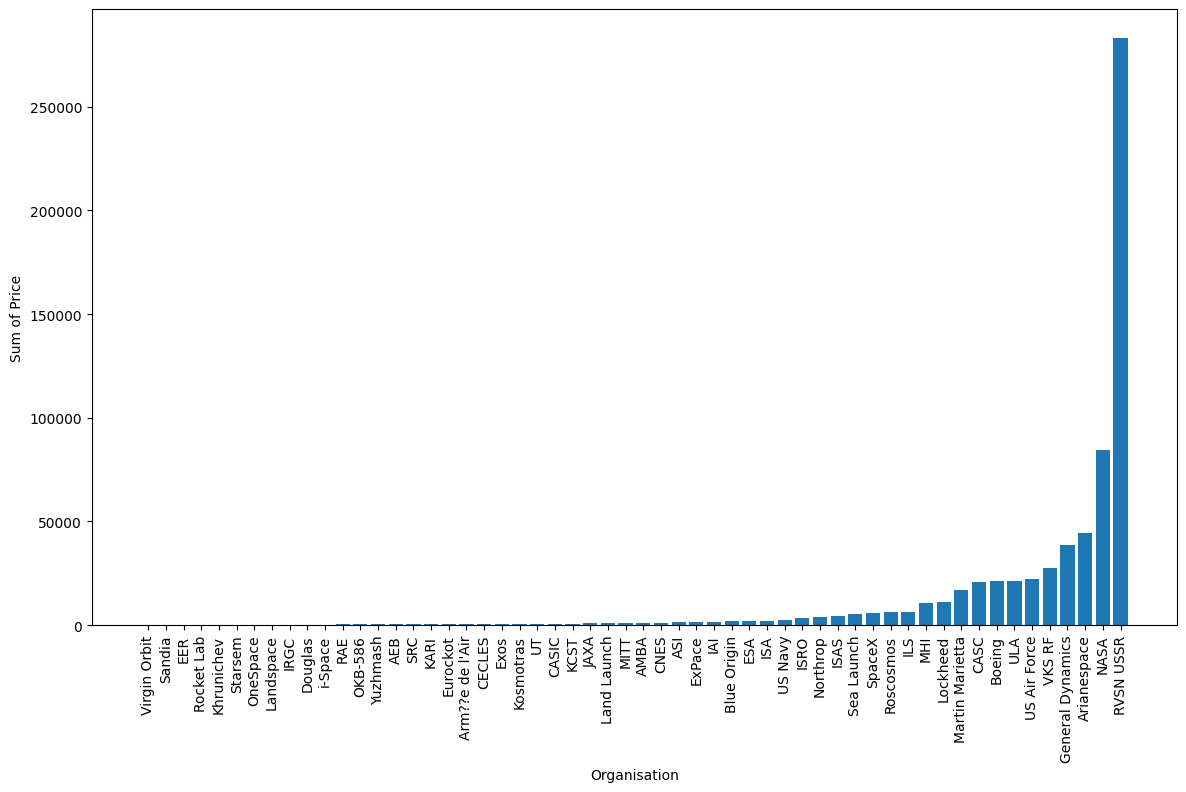

In [94]:
plt.figure(figsize=(14, 8))
plt.bar(df_organisation_sum['Organisation'], df_organisation_sum['Price'])
plt.xticks(rotation=90)
plt.xlabel('Organisation')
plt.ylabel('Sum of Price')
plt.show()

In [95]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


# Analyse the Amount of Money Spent by Organisation per Launch


In [96]:
df_organisation_avg = df_data.groupby('Organisation', as_index=False).agg({'Price': pd.Series.mean}).sort_values(by='Price')
df_organisation_avg.head()

,Organisation,Price
41,Rocket Lab,7.50
53,Virgin Orbit,12.00
44,Sandia,15.00
12,EER,20.00
28,Kosmotras,29.00


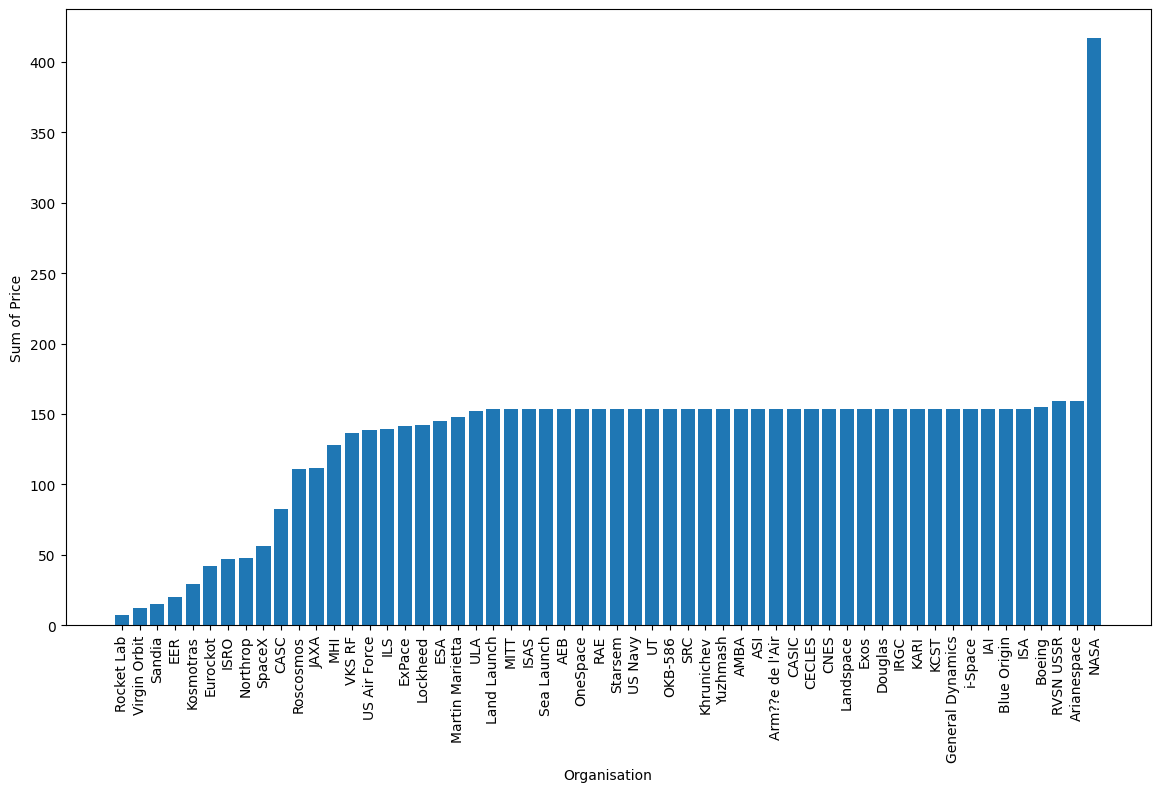

In [97]:
plt.figure(figsize=(14, 8))
plt.bar(df_organisation_avg['Organisation'], df_organisation_avg['Price'])
plt.xticks(rotation=90)
plt.xlabel('Organisation')
plt.ylabel('Sum of Price')
plt.show()

In [98]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


# Chart the Number of Launches per Year


In [100]:
df_data['Date'] = df_data['Date'].apply(lambda x: x.replace(',', ''))
df_data['Date'] = df_data['Date'].apply(lambda x: x.replace(' UTC', ''))
df_data['Date'].head()

0    Fri Aug 07 2020 05:12
1    Thu Aug 06 2020 04:01
2    Tue Aug 04 2020 23:57
3    Thu Jul 30 2020 21:25
4    Thu Jul 30 2020 11:50
Name: Date, dtype: object

In [109]:
df_data['Date'] = pd.to_datetime(df_data['Date'], format='mixed')
df_data['Year'] = pd.DatetimeIndex(df_data['Date']).year
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,2020
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success,USA,2020
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,2020
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020


In [119]:
df_launches_year = df_data['Year'].value_counts().sort_index()
df_launches_year.head()

Year
1957     3
1958    28
1959    20
1960    39
1961    52
Name: count, dtype: int64

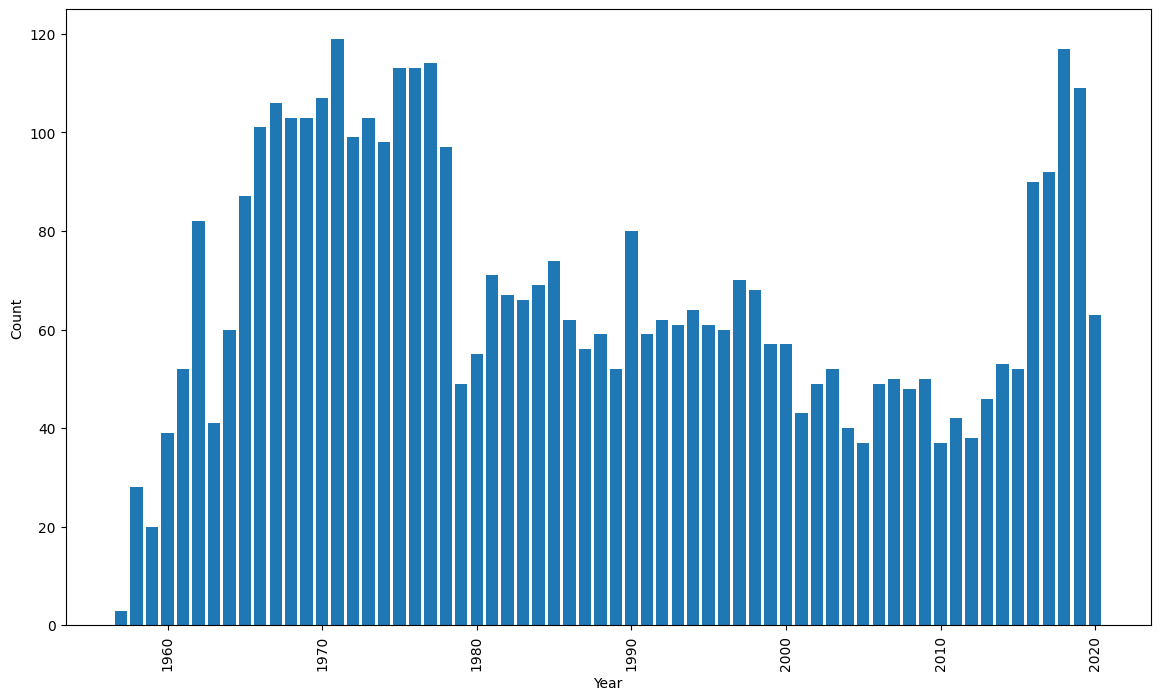

In [122]:
plt.figure(figsize=(14, 8))
plt.bar(df_launches_year.index, df_launches_year.values)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.


In [180]:
df_data['First_Of_Month'] = df_data['Date'].dt.to_period('M').dt.to_timestamp()
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month,First_Of_Month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020,2020-08-01,2020-08-01
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,2020,2020-08-01,2020-08-01
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success,USA,2020,2020-08-01,2020-08-01
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,2020,2020-07-01,2020-07-01
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020,2020-07-01,2020-07-01


In [181]:
df_monthly_count = df_data['First_Of_Month'].value_counts().sort_index()
df_monthly_count.head()

First_Of_Month
1957-10-01    1
1957-11-01    1
1957-12-01    1
1958-02-01    2
1958-03-01    3
Name: count, dtype: int64

In [182]:
df_monthly_count_rolling = df_monthly_count.rolling(window=10).sum()

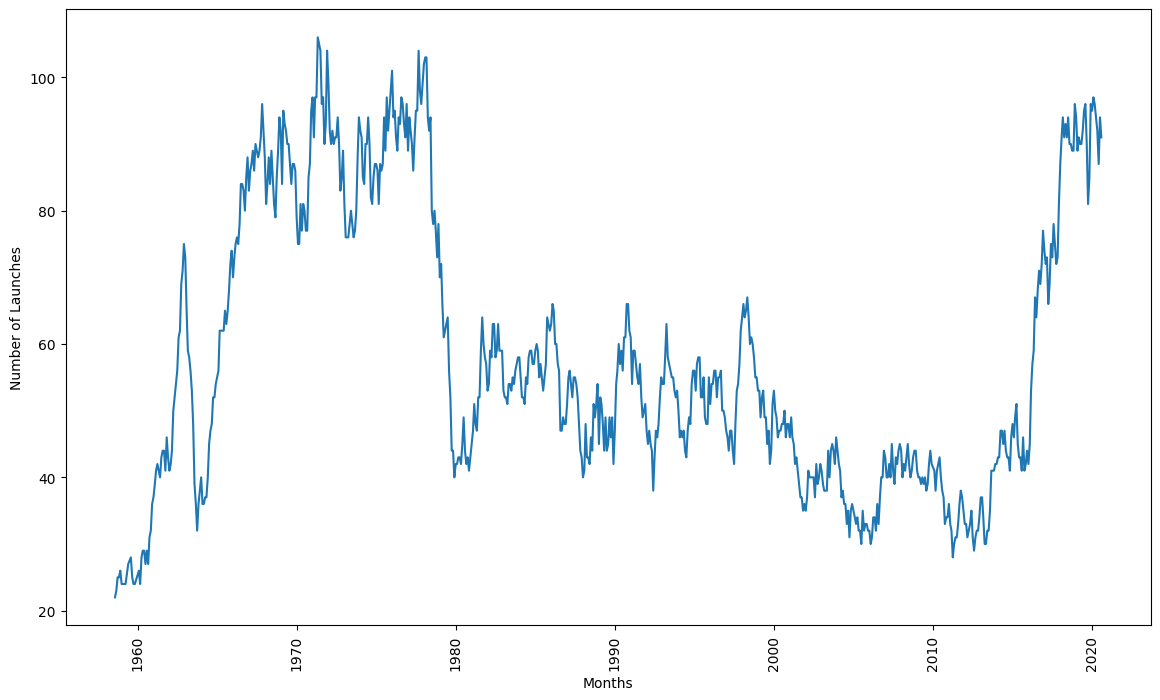

In [198]:
plt.figure(figsize=(14, 8))
plt.plot(df_monthly_count_rolling)
plt.xlabel('Months')
plt.ylabel('Number of Launches')
plt.xticks(rotation=90)
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?


In [190]:
df_data['Month'] = df_data['Date'].dt.month_name()
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month,First_Of_Month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020,August,2020-08-01
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,2020,August,2020-08-01
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success,USA,2020,August,2020-08-01
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,2020,July,2020-07-01
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020,July,2020-07-01


In [192]:
df_month_count = df_data['Month'].value_counts()
df_month_count

Month
December     450
June         402
April        383
October      381
August       373
September    365
March        353
July         351
February     336
November     336
May          326
January      268
Name: count, dtype: int64

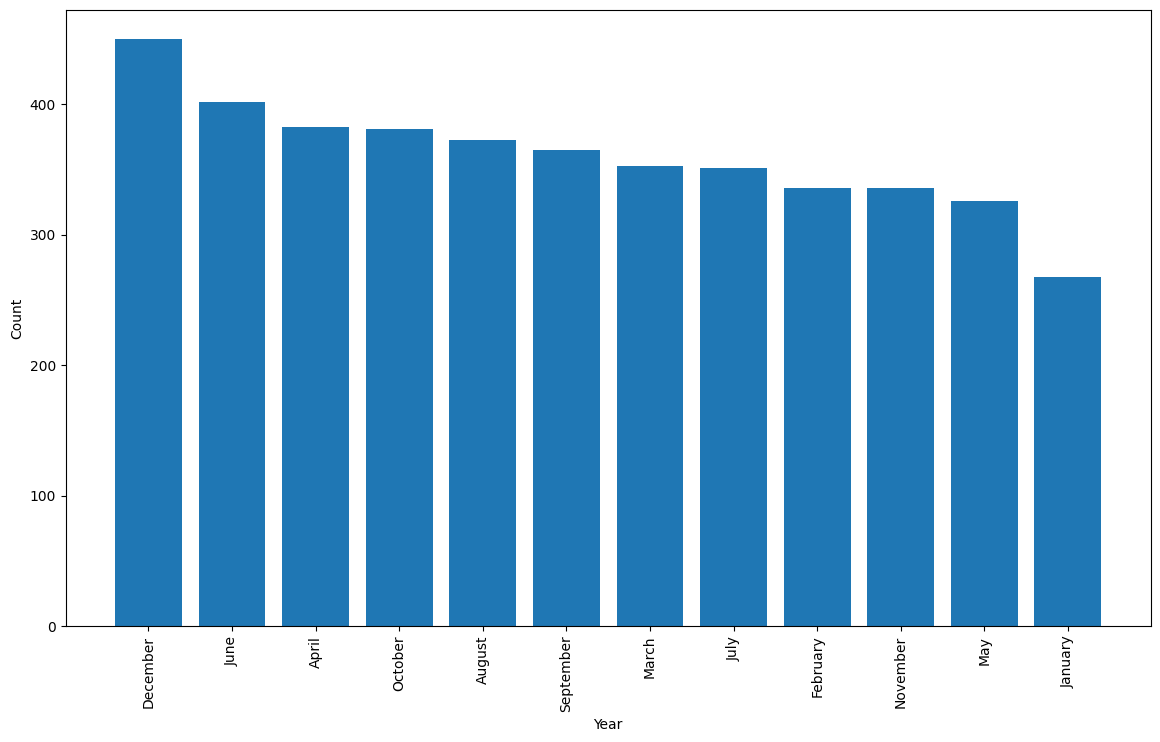

In [193]:
plt.figure(figsize=(14, 8))
plt.bar(df_month_count.index, df_month_count.values)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.


In [205]:
df_monthly_prices_rolling = df_data[['First_Of_Month', 'Price']].set_index('First_Of_Month').rolling(window=10).mean()
df_monthly_prices_rolling.head()

,Price
First_Of_Month,
2020-08-01,NaN
2020-08-01,NaN
2020-08-01,NaN
2020-07-01,NaN
2020-07-01,NaN


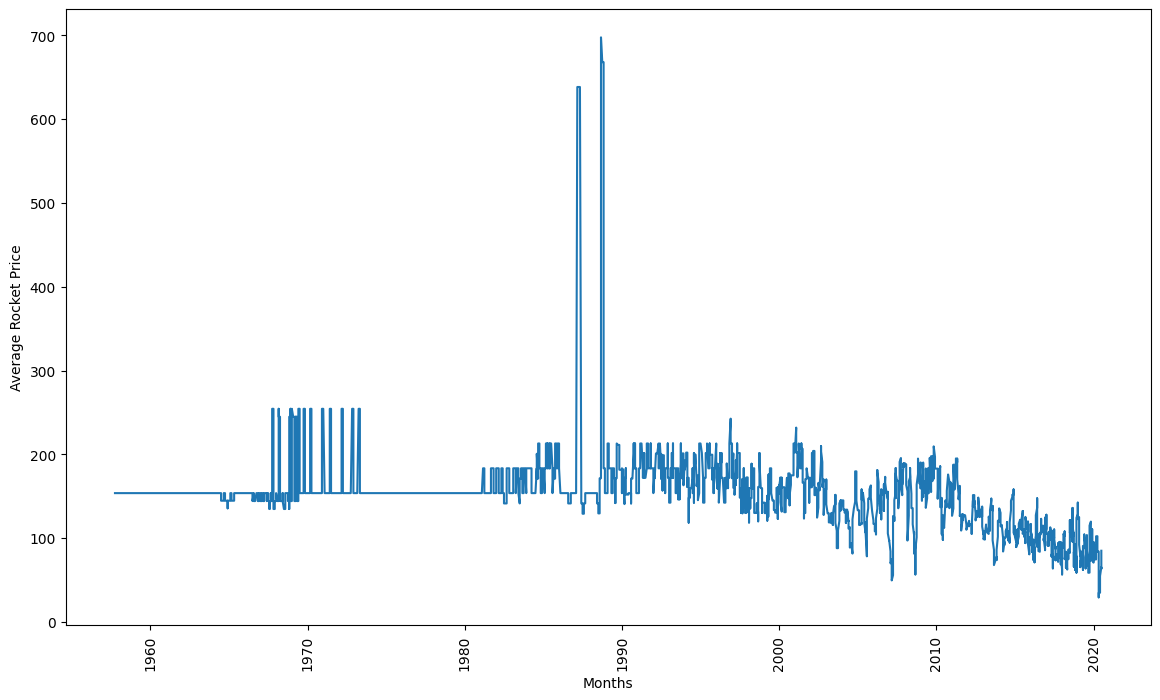

In [206]:
plt.figure(figsize=(14, 8))
plt.plot(df_monthly_prices_rolling)
plt.xlabel('Months')
plt.ylabel('Average Rocket Price')
plt.xticks(rotation=90)
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers


## Chart the Total Number of Mission Failures Year on Year.


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?
